# Logistic Regression w/Cross Validation

### Import required packages

In [ ]:
%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn import preprocessing

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

import matplotlib.pylab as plt

from dmba import classificationSummary, gainsChart, liftChart

#### The Credit Approval dataset consists of actual credit card applications and their status for either approval or denial. The predictors have been anonymized to protect confidential information about the applicants.

### Load the data and perform initial inspection

In [ ]:
data_df = pd.read_csv('credit_approval.csv')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
# Show the first 20 rows of the dataset

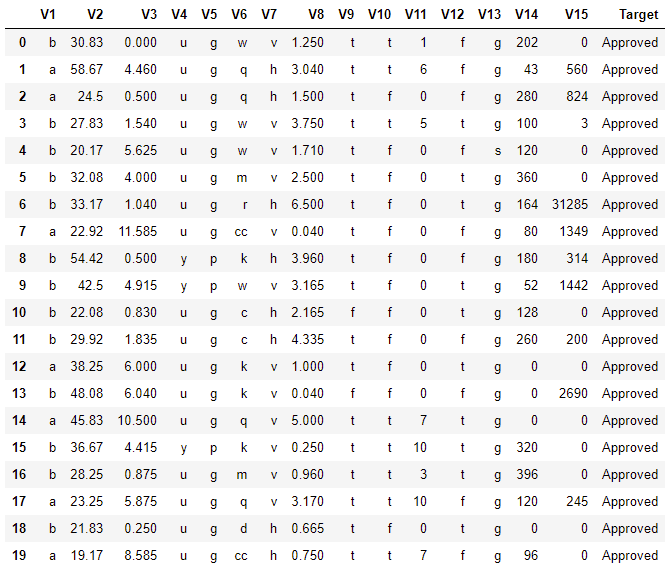

In [ ]:
# Display the number of samples and variables

In [ ]:
# Display the variable names, position in the data, count of non-null values, and datatypes

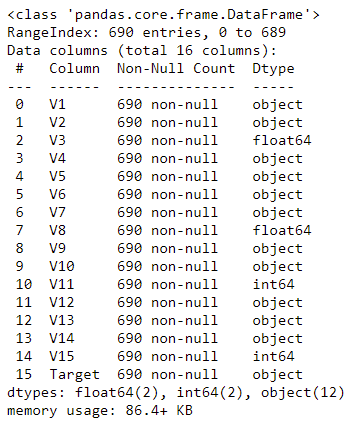

In [ ]:
# Create a y response variable and an X collection of predictors

y = data_df[???]

X = data_df.???(columns=[???])

In [ ]:
# Check the number of predictors before categorical encoding


In [ ]:
# Convert the response variable from text to numbers

y = y.astype(???).???.???

In [ ]:
# We'll try one-hot encoding first and check the dimensionality

X = ???.get_dummies(???, prefix_sep='_', drop_first=???)

In [ ]:
# Check the number of predictors after categorical 'nominal' encoding


In [ ]:
# Encode categorical variables for least expansion after encoding

import category_encoders as ce

encoder = ce.CatBoostEncoder()

X = encoder.fit_transform(X, y)

In [ ]:
# Rerun the creation of X and y objects; use CatBoostEncoder instead of get_dummies (one-hot encoding)

# Display the number of predictors after 'ordinal' encoding



In [ ]:
# Check for a class imbalance in the y object



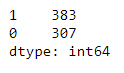

### Cross Validated Explanatory Model using GridSearchCV

In [ ]:
# Set up the parameter grid to use L2 regularization turned off through lambda (C)
# Solver can be liblinear and set class weight to none

param_grid = {
    'penalty': [???],
    'C' : [???],
    'solver': ['liblinear'],
    'class_weight': [None],
}

In [ ]:
gridSearch = GridSearchCV(LogisticRegression(), ???, cv=???)

gridSearch.???(???, ???)

print('Initial parameters: ', gridSearch.???)

logit_reg = gridSearch.??? # load the best cross-validated model into a new object

print()

print('intercept ', logit_reg.intercept_[0]) # print the intercept

print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns)) # print the coefficients

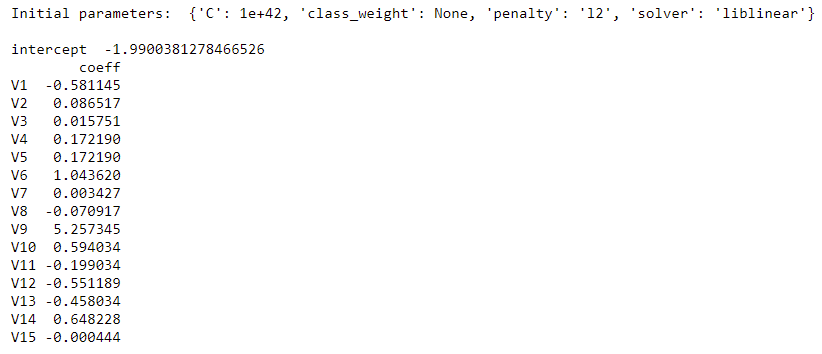

#### Recreate X and y to remove prior categorical encoding; Train/test split with stratification of the response variable

In [ ]:
# Create a y response variable and an X collection of predictors

y = ???['Target']

X = ???.drop(columns=[???])

In [ ]:
y = y.astype(???).cat.codes

In [ ]:
# Split the data into training and test sets (holdout approach)

???, ???, ???, ??? = train_test_split(X, y, test_size=0.5, stratify=???, random_state=1)

In [ ]:
import category_encoders as ce

encoder = ce.CatBoostEncoder()

train_X = encoder.fit_transform(train_X, train_y)
test_X = encoder.transform(test_X)

In [ ]:
# Display the samples and predictors in the train_X object

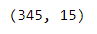

In [ ]:
# Display the class memberships in the y object

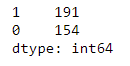

### Here are three different feature scaling algorithms - chose only one per model

In [ ]:
# Feature Scaling with Standardization

from sklearn.preprocessing import StandardScaler

stand = StandardScaler()

train_X = stand.???(train_X)
test_X = stand.???(test_X)

In [ ]:
# Feature Scaling with Normalization

from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler(feature_range=(0,3))

train_X = norm.???(???)
test_X = norm.???(???)

In [ ]:
# Feature Scaling with Robust Scaling

from sklearn.preprocessing import RobustScaler

robust = RobustScaler(with_centering=True, with_scaling=True)

train_X = ???
test_X = ???

### Predictive Model

In [ ]:
logit_reg = LogisticRegressionCV(penalty="l2", Cs=100, solver='liblinear', class_weight = None, cv=10, 
                                 max_iter=5000, scoring="accuracy", random_state=1)

model = ???.???(???, ???)

In [ ]:
# we are only interested in classification accuracy

classificationSummary(train_y, model.???(???))

classificationSummary(???, model.???(test_X))

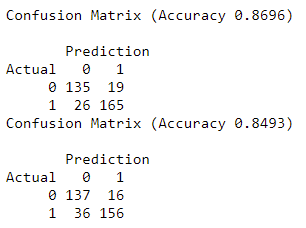

In [ ]:
# Check the performance report on the test data

classes = model.predict(???)

print(metrics.classification_report(test_y, classes))

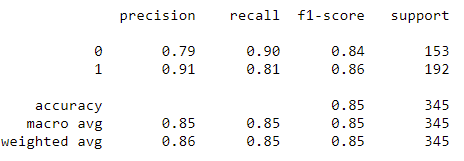

### Lift and Gain Charts

In [ ]:
# Check the model fit

%matplotlib inline

logit_reg_pred = logit_reg.predict(???)
logit_reg_proba = logit_reg.predict_proba(???)

logit_result = pd.DataFrame({'actual': test_y, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })

df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
    
plt.tight_layout()
plt.show()

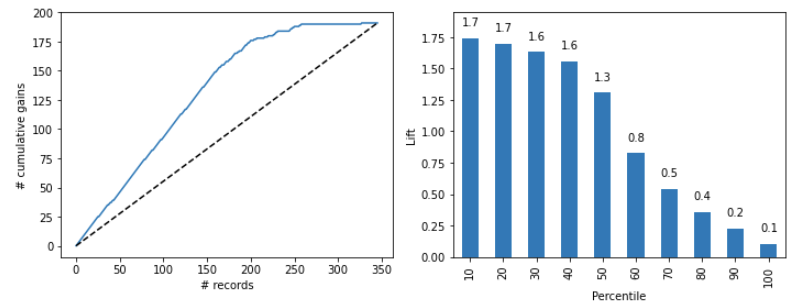

### ROC Chart

In [ ]:
# Check the model fit

logit_reg_pred = logit_reg.predict(???)
logit_reg_proba = logit_reg.predict_proba(???)

preds = logit_reg_proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_y, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

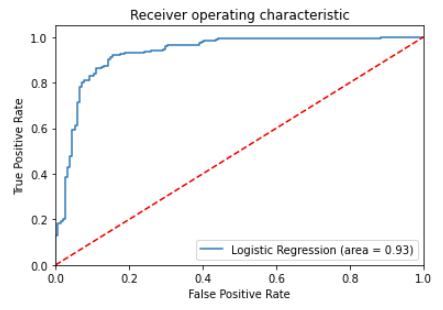